# Trabalho Prático 1 - Algoritmo de Deutsch-Jozsa
### Ramon Gonçalves Gonze
---

O algoritmo de Deutsch-Jozsa é utilizado pra verificar se uma função $f \{0,1\}^n \rightarrow \{0, 1\}$, onde sua saída é igual a $0$ se a função é balanceada ou igual a $1$ caso contrário. O circuito, composto por $n+1$ qubits, é dividido de 5 partes:

- Inicialização dos $n$ primeiros qubits em $|0>$ e o ($n+1$)-ésimo qubit em $|1>$;
- Sobreposição de todos os qubits através da aplicação da Hadamard;
- Aplicação do oráculo (matriz $U_f$);
- Aplicação da Hadamard nos $n$ primeiros qubits;
- Medição dos $n$ primeiros qubits

Se a função for **constante**, o estado dos $n$ primeiros qubits será $|0...0>$.

Se a função for **balanceada**, será medido algum estado **diferente** de $|0...0>$.

In [1]:
import numpy as np
from math import ceil, log2
from qiskit import *

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

---
# Inicialização de variáveis
---

In [2]:
# Número de qubits
n = 4

# Oráculo quântico. Decide se a função é balanceada ou constante.
oraculo = 'balanced' # Deve ser {'balanced', 'constant'}

if oraculo == 'balanced':
    # Estado final do sistema, no final do circuito
    bits = np.random.randint(1, 2**n)
else:
    # Se a função é balanceada, 'bits' indica se a função é balanceada com zeros ou uns.
    bits = 0 # Deve ser {0,1}.

print('Bits = %d'%(bits))
    
# Cria um circuito com n+1 qubits e n-1 bits clássicos (esses usados para armazenar as medições).
circuito = QuantumCircuit(n+1, n)

Bits = 10


---
# Construção do circuito
---

In [3]:
# Transforma o n-ésimo bit em |1>
circuito.x(n)

circuito.barrier()

# Aplica Hadamard em todos os qubits
circuito.h(np.arange(n+1))
    
circuito.barrier()

# Aplica o oráculo nos estados, que estão em superposição
if oraculo == 'balanced':
    bitsStr = bin(bits)[2:]
    bitsStr = '0'*(n-len(bitsStr)) + bitsStr
    
    # Adiciona CNOTS no último qubit, de acordo com a string de bits definida na variável 'bits'
    for i in np.arange(len(bitsStr)):
        if bitsStr[i] == '1':
            circuito.cx(n-i-1, n)

circuito.barrier()

# Aplica Hadamard em todos os qubits, exceto o último
circuito.h(np.arange(n))

circuito.barrier()

# Faz uma medição nos n-1 primeiros qubits
circuito.measure(np.arange(n), np.arange(n))    

---
# Visualização do circuito
---

É possível ver as 5 partes do circuito descritas anteriormente separadas pelas "barreiras" em cinza.

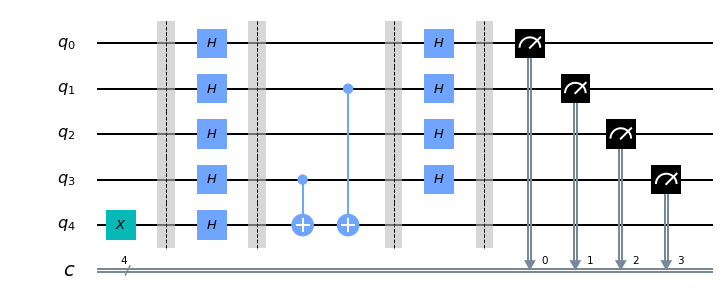

In [4]:
circuito.draw(output='mpl')

---
# Simulação do experimento
---

## Computador clássico

A simulação em um computador clássico é perfeita, isto é, podemos ver 100% de probabilidade de medição para um estado somente, sem ruído algum.

In [5]:
nSimulacoes = 10000 # Número de simulações
simulador = Aer.get_backend('qasm_simulator')
resultado = execute(circuito, backend=simulador, shots=nSimulacoes).result()

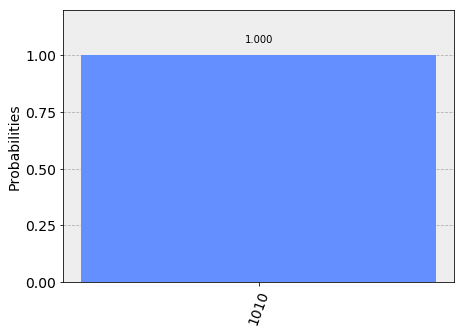

In [6]:
medicoes = resultado.get_counts()
plot_histogram(medicoes)

## Computador quântico - IBMQ

A simulação retorna uma "execução" perfeita, isto é, 100% de probabilidade de medir um certo estado. Já em um computador quântico, devemos considerar ruídos e erros de medição.

**Observação: Tentei executar em um dos computadores quânticos da IBM, porém o job ficou em espera durante muito tempo, e não foi possível executá-lo a tempo da entrega.**

Para executar os códigos abaixo é necessário executar antes as funções *IBMQ.save_account()* e *IBMQ.load_account()*.

In [ ]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_ourense')

In [ ]:
job = execute(circuit, backend=qcomp)
job_monitor(job)

In [ ]:
resultado = job.result()
plot_histogram(resultado.get_counts(circuit))